# XLNET Training
This notebook demonstrates training and performance evaluation of the XLNET generalized autoregressive model.

In [1]:
%matplotlib inline
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

## Load Dataset
First, we load a labeled dataset of crypto-related social media comments and convert the sentiment labels ('positive', 'negative', 'neutral') to numbers (0, 1, 2).

In [2]:
# Load labeled crypto sentiment data
path_to_data = '../reddit/sentiment_labels_clean.csv'
df = pd.read_csv(path_to_data)

# clip data
df = df[:1000]

# Drop columns that are not used for training
df = df.drop(['id', 'coin'], axis=1)

# Function to convert labels to number.
def sentiment2label(sentiment):
    if sentiment == 'positive':
        return 0
    elif sentiment == 'negative':
        return 1
    else: # neutral
        return 2

df['sentiment'] = df['sentiment'].apply(sentiment2label)

print(df.info())
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1000 non-null   object
 1   sentiment  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None
                                                text  sentiment
0   I have just encountered a Bitcoin scam on a d...          2
1   Maybe theyll rename themselves once theyve am...          2
2  - Part of NFT sale royalties will be swapped f...          2
3  ' The requested withdrawal amount is lower tha...          2
4   this clown still buying machine slave produce...          1
5  "Buy this, buy that" is terrible advice. I see...          1
6  "Crypto Analyst says bitcoin will be $100k/$30...          0
7         "cute animal faces" im looking at you Doge          0
8  "During that BTC run" most altcoins will also ...          2
9  "In the end, it doesnt matter if you hav

## XLNET Training
Here, the XLNetSentimentTrain class is used to train the XLNET model on the cypto dataset.  The tuning hyperparameters are: batchsize, number of epochs, and text sequence length. 

In [3]:
# Import training class
from xlnet import XLNetSentimentTrain

In [4]:
# Some tuning advice available at:
# https://mccormickml.com/2019/09/19/XLNet-fine-tuning/
#
# Run training on the labeled crypto data - find the best batch size
# Todo: Batchsize of 128 is also recommended, but don't have enough GPU memory
batches=[64, 48, 32, 16]
history = []
for batchsize in batches:
    xlnet_train = XLNetSentimentTrain(batchsize=batchsize, max_len=64)
    history.append(xlnet_train.train(df, ['text', 'sentiment']))

device cuda:0


Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.weight', 'logits_proj.bias', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

Epoch 1/20
----------
train_epoch 0/8
train_epoch 1/8
train_epoch 2/8
train_epoch 3/8
train_epoch 4/8
train_epoch 5/8
train_epoch 6/8
train_epoch 7/8
Filling partial batch (got 52, expected 64)
Train loss 0.917634402002607 Train accuracy 0.6428571428571429
eval_model 0/4
eval_model 1/4
eval_model 2/4
eval_model 3/4
Skipped partial batch (got 58, expected 64)
Val loss 0.9170379241307577 Val accuracy 0.6614583333333334

Saving model ./models/xlnet_model_batch64.bin
Epoch 2/20
----------
train_epoch 0/8
train_epoch 1/8
train_epoch 2/8
train_epoch 3/8
train_epoch 4/8
train_epoch 5/8
train_epoch 6/8
train_epoch 7/8
Filling partial batch (got 52, expected 64)
Train loss 0.8351039460727147 Train accuracy 0.6629464285714286
eval_model 0/4
eval_model 1/4
eval_model 2/4
eval_model 3/4
Skipped partial batch (got 58, expected 64)
Val loss 0.8619025746981303 Val accuracy 0.6614583333333334

Epoch 3/20
----------
train_epoch 0/8
train_epoch 1/8
train_epoch 2/8
train_epoch 3/8
train_epoch 4/8
train_e

train_epoch 0/8
train_epoch 1/8
train_epoch 2/8
train_epoch 3/8
train_epoch 4/8
train_epoch 5/8
train_epoch 6/8
train_epoch 7/8
Filling partial batch (got 52, expected 64)
Train loss 0.016141011512705257 Train accuracy 0.9955357142857143
eval_model 0/4
eval_model 1/4
eval_model 2/4
eval_model 3/4
Skipped partial batch (got 58, expected 64)
Val loss 1.510250449180603 Val accuracy 0.6822916666666666

eval_model 0/4
eval_model 1/4
eval_model 2/4
eval_model 3/4
Skipped partial batch (got 58, expected 64)
Test Accuracy : 0.75
Test Loss : 0.903520425160726
Skipped partial batch (got 58, expected 64)
device cuda:0


Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.weight', 'logits_proj.bias', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

Epoch 1/20
----------
train_epoch 0/11
train_epoch 1/11
train_epoch 2/11
train_epoch 3/11
train_epoch 4/11
train_epoch 5/11
train_epoch 6/11
train_epoch 7/11
train_epoch 8/11
train_epoch 9/11
train_epoch 10/11
Filling partial batch (got 20, expected 48)
Train loss 0.8968266010284424 Train accuracy 0.6499999999999999
eval_model 0/6
eval_model 1/6
eval_model 2/6
eval_model 3/6
eval_model 4/6
eval_model 5/6
Skipped partial batch (got 10, expected 48)
Val loss 0.856189239025116 Val accuracy 0.6791666666666666

Saving model ./models/xlnet_model_batch48.bin
Epoch 2/20
----------
train_epoch 0/11
train_epoch 1/11
train_epoch 2/11
train_epoch 3/11
train_epoch 4/11
train_epoch 5/11
train_epoch 6/11
train_epoch 7/11
train_epoch 8/11
train_epoch 9/11
train_epoch 10/11
Filling partial batch (got 20, expected 48)
Train loss 0.8520925581455231 Train accuracy 0.6645833333333333
eval_model 0/6
eval_model 1/6
eval_model 2/6
eval_model 3/6
eval_model 4/6
eval_model 5/6
Skipped partial batch (got 10, exp

train_epoch 0/11
train_epoch 1/11
train_epoch 2/11
train_epoch 3/11
train_epoch 4/11
train_epoch 5/11
train_epoch 6/11
train_epoch 7/11
train_epoch 8/11
train_epoch 9/11
train_epoch 10/11
Filling partial batch (got 20, expected 48)
Train loss 0.025860922131687402 Train accuracy 0.9916666666666666
eval_model 0/6
eval_model 1/6
eval_model 2/6
eval_model 3/6
eval_model 4/6
eval_model 5/6
Skipped partial batch (got 10, expected 48)
Val loss 1.4820111036300658 Val accuracy 0.6833333333333332

Epoch 18/20
----------
train_epoch 0/11
train_epoch 1/11
train_epoch 2/11
train_epoch 3/11
train_epoch 4/11
train_epoch 5/11
train_epoch 6/11
train_epoch 7/11
train_epoch 8/11
train_epoch 9/11
train_epoch 10/11
Filling partial batch (got 20, expected 48)
Train loss 0.01624949073884636 Train accuracy 0.9979166666666668
eval_model 0/6
eval_model 1/6
eval_model 2/6
eval_model 3/6
eval_model 4/6
eval_model 5/6
Skipped partial batch (got 10, expected 48)
Val loss 1.547101378440857 Val accuracy 0.65416666666

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.weight', 'logits_proj.bias', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

Epoch 1/20
----------
train_epoch 0/16
train_epoch 1/16
train_epoch 2/16
train_epoch 3/16
train_epoch 4/16
train_epoch 5/16
train_epoch 6/16
train_epoch 7/16
train_epoch 8/16
train_epoch 9/16
train_epoch 10/16
train_epoch 11/16
train_epoch 12/16
train_epoch 13/16
train_epoch 14/16
train_epoch 15/16
Filling partial batch (got 20, expected 32)
Train loss 0.8816971182823181 Train accuracy 0.6583333333333333
eval_model 0/8
eval_model 1/8
eval_model 2/8
eval_model 3/8
eval_model 4/8
eval_model 5/8
eval_model 6/8
eval_model 7/8
Skipped partial batch (got 26, expected 32)
Val loss 0.8573705894606454 Val accuracy 0.6741071428571429

Saving model ./models/xlnet_model_batch32.bin
Epoch 2/20
----------
train_epoch 0/16
train_epoch 1/16
train_epoch 2/16
train_epoch 3/16
train_epoch 4/16
train_epoch 5/16
train_epoch 6/16
train_epoch 7/16
train_epoch 8/16
train_epoch 9/16
train_epoch 10/16
train_epoch 11/16
train_epoch 12/16
train_epoch 13/16
train_epoch 14/16
train_epoch 15/16
Filling partial batch

eval_model 6/8
eval_model 7/8
Skipped partial batch (got 26, expected 32)
Val loss 1.1436094556535994 Val accuracy 0.7366071428571429

Epoch 14/20
----------
train_epoch 0/16
train_epoch 1/16
train_epoch 2/16
train_epoch 3/16
train_epoch 4/16
train_epoch 5/16
train_epoch 6/16
train_epoch 7/16
train_epoch 8/16
train_epoch 9/16
train_epoch 10/16
train_epoch 11/16
train_epoch 12/16
train_epoch 13/16
train_epoch 14/16
train_epoch 15/16
Filling partial batch (got 20, expected 32)
Train loss 0.024974830246840916 Train accuracy 0.9958333333333333
eval_model 0/8
eval_model 1/8
eval_model 2/8
eval_model 3/8
eval_model 4/8
eval_model 5/8
eval_model 6/8
eval_model 7/8
Skipped partial batch (got 26, expected 32)
Val loss 1.2815738916397095 Val accuracy 0.7366071428571429

Epoch 15/20
----------
train_epoch 0/16
train_epoch 1/16
train_epoch 2/16
train_epoch 3/16
train_epoch 4/16
train_epoch 5/16
train_epoch 6/16
train_epoch 7/16
train_epoch 8/16
train_epoch 9/16
train_epoch 10/16
train_epoch 11/16


Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.weight', 'logits_proj.bias', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

Epoch 1/20
----------
train_epoch 0/32
train_epoch 1/32
train_epoch 2/32
train_epoch 3/32
train_epoch 4/32
train_epoch 5/32
train_epoch 6/32
train_epoch 7/32
train_epoch 8/32
train_epoch 9/32
train_epoch 10/32
train_epoch 11/32
train_epoch 12/32
train_epoch 13/32
train_epoch 14/32
train_epoch 15/32
train_epoch 16/32
train_epoch 17/32
train_epoch 18/32
train_epoch 19/32
train_epoch 20/32
train_epoch 21/32
train_epoch 22/32
train_epoch 23/32
train_epoch 24/32
train_epoch 25/32
train_epoch 26/32
train_epoch 27/32
train_epoch 28/32
train_epoch 29/32
train_epoch 30/32
train_epoch 31/32
Filling partial batch (got 4, expected 16)
Train loss 0.8938404994626199 Train accuracy 0.6633064516129032
eval_model 0/16
eval_model 1/16
eval_model 2/16
eval_model 3/16
eval_model 4/16
eval_model 5/16
eval_model 6/16
eval_model 7/16
eval_model 8/16
eval_model 9/16
eval_model 10/16
eval_model 11/16
eval_model 12/16
eval_model 13/16
eval_model 14/16
eval_model 15/16
Skipped partial batch (got 10, expected 16)

eval_model 0/16
eval_model 1/16
eval_model 2/16
eval_model 3/16
eval_model 4/16
eval_model 5/16
eval_model 6/16
eval_model 7/16
eval_model 8/16
eval_model 9/16
eval_model 10/16
eval_model 11/16
eval_model 12/16
eval_model 13/16
eval_model 14/16
eval_model 15/16
Skipped partial batch (got 10, expected 16)
Val loss 1.5262705047925313 Val accuracy 0.6666666666666666

Epoch 9/20
----------
train_epoch 0/32
train_epoch 1/32
train_epoch 2/32
train_epoch 3/32
train_epoch 4/32
train_epoch 5/32
train_epoch 6/32
train_epoch 7/32
train_epoch 8/32
train_epoch 9/32
train_epoch 10/32
train_epoch 11/32
train_epoch 12/32
train_epoch 13/32
train_epoch 14/32
train_epoch 15/32
train_epoch 16/32
train_epoch 17/32
train_epoch 18/32
train_epoch 19/32
train_epoch 20/32
train_epoch 21/32
train_epoch 22/32
train_epoch 23/32
train_epoch 24/32
train_epoch 25/32
train_epoch 26/32
train_epoch 27/32
train_epoch 28/32
train_epoch 29/32
train_epoch 30/32
train_epoch 31/32
Filling partial batch (got 4, expected 16)
Tr

train_epoch 22/32
train_epoch 23/32
train_epoch 24/32
train_epoch 25/32
train_epoch 26/32
train_epoch 27/32
train_epoch 28/32
train_epoch 29/32
train_epoch 30/32
train_epoch 31/32
Filling partial batch (got 4, expected 16)
Train loss 0.007238202721055131 Train accuracy 0.9979838709677419
eval_model 0/16
eval_model 1/16
eval_model 2/16
eval_model 3/16
eval_model 4/16
eval_model 5/16
eval_model 6/16
eval_model 7/16
eval_model 8/16
eval_model 9/16
eval_model 10/16
eval_model 11/16
eval_model 12/16
eval_model 13/16
eval_model 14/16
eval_model 15/16
Skipped partial batch (got 10, expected 16)
Val loss 2.0144939760367078 Val accuracy 0.7041666666666667

Epoch 17/20
----------
train_epoch 0/32
train_epoch 1/32
train_epoch 2/32
train_epoch 3/32
train_epoch 4/32
train_epoch 5/32
train_epoch 6/32
train_epoch 7/32
train_epoch 8/32
train_epoch 9/32
train_epoch 10/32
train_epoch 11/32
train_epoch 12/32
train_epoch 13/32
train_epoch 14/32
train_epoch 15/32
train_epoch 16/32
train_epoch 17/32
train_e

/home/rrmorris/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rrmorris/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rrmorris/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
for hist in history:
    print('Epochs: {}'.format(hist['epochs']))
    print('Batchsize: {}'.format(hist['batchsize']))
    print('Max len: {}'.format(hist['max_len']))
    print(hist['classification_report'])
    print()

Epochs: 20
Batchsize: 64
Max len: 64
              precision    recall  f1-score   support

    positive       0.61      0.44      0.51        43
    negative       0.50      0.42      0.46        19
     neutral       0.81      0.90      0.85       130

    accuracy                           0.75       192
   macro avg       0.64      0.59      0.61       192
weighted avg       0.73      0.75      0.74       192


Epochs: 20
Batchsize: 48
Max len: 64
              precision    recall  f1-score   support

    positive       0.76      0.45      0.57        55
    negative       0.40      0.27      0.32        22
     neutral       0.79      0.93      0.85       163

    accuracy                           0.76       240
   macro avg       0.65      0.55      0.58       240
weighted avg       0.74      0.76      0.74       240


Epochs: 20
Batchsize: 32
Max len: 64
              precision    recall  f1-score   support

    positive       0.70      0.28      0.40        50
    negative    

## Batch Size Selection
Batchsize=64, 48 and 16 have the best overall accuracy (>= 75) but batchsize=48 has best balance of precision and recall scores. We will use batchsize=48.

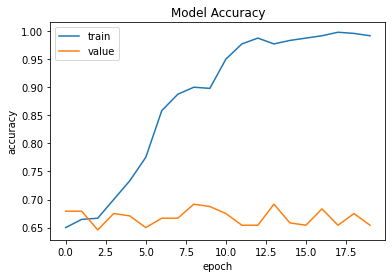

In [6]:
best = history[1]
# Plot of training and value accuracy
plt.plot(best['train_acc'])
plt.plot(best['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'value'], loc='upper left')
plt.show()

# Training accuracy starts to level off after about 11 epochs and the best value accuracy is found at 8 epochs.

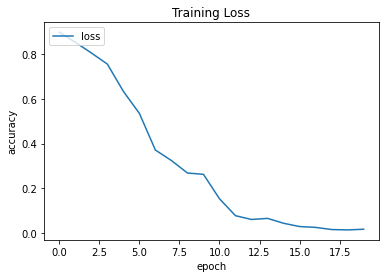

In [7]:
# Plot of training loss
plt.plot(best['train_loss'])
plt.title('Training Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

# This training loss curve indicates a low learning rate
# https://towardsdatascience.com/useful-plots-to-diagnose-your-neural-network-521907fa2f45

In [8]:
# Run training on the labeled crypto data - find the best sequence len
#sequences=[256, 128, 64]
sequences=[128, 64]
history = []
for seq in sequences:
    xlnet_train = XLNetSentimentTrain(batchsize=64, max_len=seq)
    history.append(xlnet_train.train(df, ['text', 'sentiment']))

device cuda:0


Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.weight', 'logits_proj.bias', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

Epoch 1/20
----------
train_epoch 0/8


RuntimeError: CUDA out of memory. Tried to allocate 96.00 MiB (GPU 0; 7.93 GiB total capacity; 7.14 GiB already allocated; 33.12 MiB free; 7.20 GiB reserved in total by PyTorch)

# Sequence Length Selection
We don't have enough GPU memory to train sequence length of 128, so will use 64.

In [5]:
for hist in history:
    print('Epochs: {}'.format(hist['epochs']))
    print('Batchsize: {}'.format(hist['batchsize']))
    print('Max len: {}'.format(hist['max_len']))
    print(hist['classification_report'])
    print()
    
# Max_len of 64 gives the best total accuracy and recall

## Final Resultes
The following parameters for XLNet training are giving the best results:
- Epochs - 20
- Batchsize - 48
- Max_len - 64

## Try a Few Predictions
Next we load the model file and try a few predictions.

In [1]:
from xlnet import XLNetSentiment

model_file = './models/xlnet_model_batch48.bin'
xlnet = XLNetSentiment(model_file, batchsize=1)

text = "Bitcoin is the worst!"
results = xlnet.predict(text)
print(results)

text = "Bitcoin is the best!"
results = xlnet.predict(text)
print(results)

device cuda:0


Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.bias', 'lm_loss.weight']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.weight', 'sequence_summary.summary.bias', 'logits_proj.weight', 'logits_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

{'positive_score': 0.06985868513584137, 'negative_score': 0.7878771424293518, 'neutral_score': 0.142264261841774, 'text': 'Bitcoin is the worst!', 'sentiment': 'negative'}
{'positive_score': 0.6702779531478882, 'negative_score': 0.0223531574010849, 'neutral_score': 0.3073689043521881, 'text': 'Bitcoin is the best!', 'sentiment': 'positive'}
